In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize

In [45]:
filename = "MCRealTimeCorrelationsDiffpoint05.csv"

tdiff = 0.05

if filename[:2] == 'HD':
    title = 'High Density Phase'
    alpha = 0.75
    beta = 0.25
elif filename[:2] == 'LD':
    title = 'Low Density Phase'
    alpha = 0.25
    beta = 0.75
else:
    title = 'Maximal Current Phase'
    alpha = 0.75
    beta = 0.75

In [46]:
df = pd.read_csv(filename)
df.head()

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
av_tau_u = np.array(df.mean(axis=0))
av_tau_0 = av_tau_u[0]
new_df = df.mul(df.iloc[:, 0], axis=0)
av_tau_product = np.array(new_df.mean(axis=0))

corr_func = av_tau_product - av_tau_0 * av_tau_u

In [48]:
def model_func(t, A, K):
    return A * t**(-K)

def fit_power_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y)
    A, K = opt_parms
    return A, K

def plot(ax, t, y, fit_y, fit_parms):
    A, K = fit_parms
    ax.plot(t, fit_y, 'b-',
    label='Fitted Function:\n $y = %0.2f x^{-%0.2f}$' % (A, K))
    ax.plot(t, y, 'ro')
    ax.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)
    
def plot_linearised(ax, t, y, fit_y, fit_parms):
    A, K = fit_parms
    ax.plot(np.log(t), np.log(fit_y), 'b-',
    label='Fitted Function:\n $y = %0.2f-%0.2f x$' % (np.log(A), K))
    ax.plot(np.log(t), np.log(y), 'ro')
    ax.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)

In [49]:
t = np.arange(0, len(corr_func)*tdiff, tdiff)
t = t[1:]
corr_func = corr_func[1:]

Correlation time is 2.0398494809672734


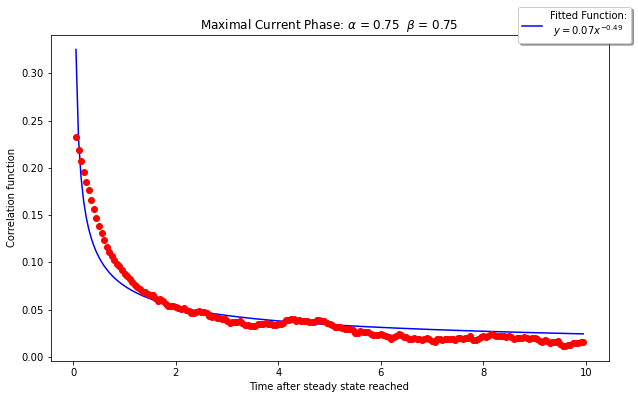

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))

# Non-linear Fit
A, K = fit_power_nonlinear(t, corr_func)
print('Correlation time is {}'.format(1.0/K))
fit_y = model_func(t, A, K)
plot(ax, t, corr_func, fit_y, (A, K))
ax.set_title(r'{}: $\alpha$ = {}  $\beta$ = {}'.format(title, alpha, beta))
ax.set_xlabel('Time after steady state reached')
ax.set_ylabel('Correlation function')

plt.show()

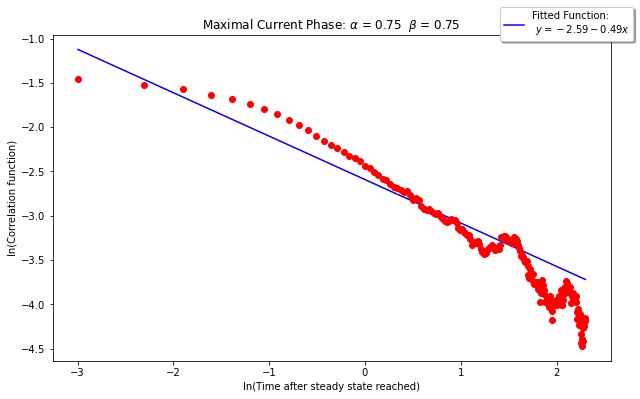

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))

plot_linearised(ax, t, corr_func, fit_y, (A, K))
ax.set_title(r'{}: $\alpha$ = {}  $\beta$ = {}'.format(title, alpha, beta))
ax.set_xlabel('ln(Time after steady state reached)')
ax.set_ylabel('ln(Correlation function)')

plt.show()